In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Let's import the data:

Working directory: C:\Users\user\Dropbox\Data Analysis\Portfolio\Data Sets\Deforestation

In [2]:
d = pd.read_csv("C:/Users/user/Dropbox/Data Analysis/Portfolio/Data Sets/Deforestation/Monitoring_Data_Unprocessed.csv", 
                encoding = "ISO-8859-1")

Explore the data:

In [3]:
d.head()

,Year,Month,Country,Prov_Depto,Detpo_Distr_Mun,Deforestation (ha),Unnamed: 6,Unnamed: 7
0,2012,March,Argentina,Catamarca,La Paz,105.0,NaN,NaN
1,2012,March,Argentina,Catamarca,Santa Rosa,290.3,NaN,NaN
2,2012,March,Argentina,Chaco,12 de Octubre,9.6,NaN,NaN
3,2012,March,Argentina,Chaco,Almirante Brown,2004.7,NaN,NaN
4,2012,March,Argentina,Chaco,General Güemes,478.8,NaN,NaN


We need to delete two columns that are empty. Pandas has a great way using drop

In [4]:
d.drop(d.columns[[6, 7]], axis = 1, inplace = True)

Let's rename Deforestation (ha)

In [5]:
d.rename(index=str, columns={"Deforestation (ha)": "Deforestation_ha"}, inplace=True)

d.head()

,Year,Month,Country,Prov_Depto,Detpo_Distr_Mun,Deforestation_ha
0,2012,March,Argentina,Catamarca,La Paz,105.0
1,2012,March,Argentina,Catamarca,Santa Rosa,290.3
2,2012,March,Argentina,Chaco,12 de Octubre,9.6
3,2012,March,Argentina,Chaco,Almirante Brown,2004.7
4,2012,March,Argentina,Chaco,General Güemes,478.8


In [6]:
d.groupby('Month').count()

,Year,Country,Prov_Depto,Detpo_Distr_Mun,Deforestation_ha
Month,,,,,
Abril,38,38,38,38,38
April,254,254,254,254,254
August,391,391,391,391,391
December,305,305,305,305,305
February,289,289,289,289,289
January,339,339,339,339,339
July,398,398,398,398,398
June,291,291,291,291,291
March,325,325,325,325,325


In [7]:
d.replace({'Month': {'Abril': 'April'}}, inplace=True)

In [8]:
d.groupby('Month').count()

,Year,Country,Prov_Depto,Detpo_Distr_Mun,Deforestation_ha
Month,,,,,
April,292,292,292,292,292
August,391,391,391,391,391
December,305,305,305,305,305
February,289,289,289,289,289
January,339,339,339,339,339
July,398,398,398,398,398
June,291,291,291,291,291
March,325,325,325,325,325
May,278,278,278,278,278


Let's create a function that gives you a month in numbers, like '10-31'. We will append this to the year later on.

In [9]:
def month_to_number (month):
    name = {
    "January": '01-31',
    "February": '02-28',
    "March": '03-31',
    "April": '04-30',
    "May": '05-31',
    "June": '06-30',
    "July": '07-31',
    "August": '08-31',
    "September": '09-30',
    "October": '10-31',
    "November": '11-30',
    "December": '12-31'
    }
    return(name[month])

month_to_number ("January")

'01-31'

In [10]:
d['month_num'] = d['Month'].apply(lambda x: month_to_number(x))

In [11]:
d.head(60)

,Year,Month,Country,Prov_Depto,Detpo_Distr_Mun,Deforestation_ha,month_num
0,2012,March,Argentina,Catamarca,La Paz,105.0,03-31
1,2012,March,Argentina,Catamarca,Santa Rosa,290.3,03-31
2,2012,March,Argentina,Chaco,12 de Octubre,9.6,03-31
3,2012,March,Argentina,Chaco,Almirante Brown,2004.7,03-31
4,2012,March,Argentina,Chaco,General Güemes,478.8,03-31
5,2012,March,Argentina,Córdoba,Minas,24.2,03-31
6,2012,March,Argentina,Formosa,Bermejo,1293.0,03-31
7,2012,March,Argentina,Formosa,Patiño,1775.6,03-31
8,2012,March,Argentina,La Rioja,Capital,38.5,03-31
9,2012,March,Argentina,Salta,Anta,166.5,03-31


We want to plot by date, so we need to make a pandas time series. Let's create a column that combines the colomns 'Year' and 'Month_Num' to create a one named 'Date'.

In [12]:
d['Date'] = d['Year'].map(str) + "-" + d['month_num']

In [13]:
d.head()

,Year,Month,Country,Prov_Depto,Detpo_Distr_Mun,Deforestation_ha,month_num,Date
0,2012,March,Argentina,Catamarca,La Paz,105.0,03-31,2012-03-31
1,2012,March,Argentina,Catamarca,Santa Rosa,290.3,03-31,2012-03-31
2,2012,March,Argentina,Chaco,12 de Octubre,9.6,03-31,2012-03-31
3,2012,March,Argentina,Chaco,Almirante Brown,2004.7,03-31,2012-03-31
4,2012,March,Argentina,Chaco,General Güemes,478.8,03-31,2012-03-31


---------------
From [stackoverflow:](https://stackoverflow.com/questions/1574088/plotting-time-in-python-with-matplotlib)

You must first convert your timestamps to Python datetime objects (use `datetime.strptime`). Then use `date2num` to convert the dates to matplotlib format.
Plot the dates and values using `plot_date`:

In [14]:
import calendar

calendar.month_abbr[12]
list(calendar.month_abbr).index('Dec')

a=pd.DatetimeIndex(start='2010-01-01',end='2014-01-01' , freq='M')
a

DatetimeIndex(['2010-01-31', '2010-02-28', '2010-03-31', '2010-04-30',
               '2010-05-31', '2010-06-30', '2010-07-31', '2010-08-31',
               '2010-09-30', '2010-10-31', '2010-11-30', '2010-12-31',
               '2011-01-31', '2011-02-28', '2011-03-31', '2011-04-30',
               '2011-05-31', '2011-06-30', '2011-07-31', '2011-08-31',
               '2011-09-30', '2011-10-31', '2011-11-30', '2011-12-31',
               '2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31', '2012-06-30', '2012-07-31', '2012-08-31',
               '2012-09-30', '2012-10-31', '2012-11-30', '2012-12-31',
               '2013-01-31', '2013-02-28', '2013-03-31', '2013-04-30',
               '2013-05-31', '2013-06-30', '2013-07-31', '2013-08-31',
               '2013-09-30', '2013-10-31', '2013-11-30', '2013-12-31'],
              dtype='datetime64[ns]', freq='M')

In [15]:
from datetime import datetime

d['Date'] = d['Date'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))
d['date_num'] = plt.matplotlib.dates.date2num(d['Date'])

In [16]:
d.head()

,Year,Month,Country,Prov_Depto,Detpo_Distr_Mun,Deforestation_ha,month_num,Date,date_num
0,2012,March,Argentina,Catamarca,La Paz,105.0,03-31,2012-03-31,734593.0
1,2012,March,Argentina,Catamarca,Santa Rosa,290.3,03-31,2012-03-31,734593.0
2,2012,March,Argentina,Chaco,12 de Octubre,9.6,03-31,2012-03-31,734593.0
3,2012,March,Argentina,Chaco,Almirante Brown,2004.7,03-31,2012-03-31,734593.0
4,2012,March,Argentina,Chaco,General Güemes,478.8,03-31,2012-03-31,734593.0


Just for fun, let's rearange the column order and put the date columns at the beginning.

In [17]:
cols = d.columns.tolist()

Let's put `["Date"]` as the first column.

In [18]:
cols = [cols[7]] + cols[:7] + [cols[8]]
cols

['Date',
 'Year',
 'Month',
 'Country',
 'Prov_Depto',
 'Detpo_Distr_Mun ',
 'Deforestation_ha',
 'month_num',
 'date_num']

In [19]:
# we create the new dataframe with the column names rearanged in the preferred order
d = d[cols]

In [20]:
d.head()

,Date,Year,Month,Country,Prov_Depto,Detpo_Distr_Mun,Deforestation_ha,month_num,date_num
0,2012-03-31,2012,March,Argentina,Catamarca,La Paz,105.0,03-31,734593.0
1,2012-03-31,2012,March,Argentina,Catamarca,Santa Rosa,290.3,03-31,734593.0
2,2012-03-31,2012,March,Argentina,Chaco,12 de Octubre,9.6,03-31,734593.0
3,2012-03-31,2012,March,Argentina,Chaco,Almirante Brown,2004.7,03-31,734593.0
4,2012-03-31,2012,March,Argentina,Chaco,General Güemes,478.8,03-31,734593.0


## Adding New Data to Dataframe
Here, we will add two months that were missing from the original data (November and December 2017). We'll import the data as csv, format all columns like our main dataframe (d) and then append the new dataframe with the old dataframe.


In [21]:
miss = pd.read_csv("C:/Users/user/Dropbox/Data Analysis/Portfolio/Data Sets/Deforestation/Nov_Dec_2017_Guyra.csv")
miss.head()

,Year,Month,mth_num,Country,Prov_Depto,Detpo_Distr_Mun,Deforestation (ha)
0,2017,November,11,Argentina,Catamarca,La Paz,144
1,2017,November,11,Argentina,Chaco,9 de Julio,363
2,2017,November,11,Argentina,Chaco,Almirante Brown,2548
3,2017,November,11,Argentina,Chaco,Comandante Fernández,144
4,2017,November,11,Argentina,Chaco,General Belgrano,263


In [22]:
# renaming "Deforestation (ha)" column to "Deforestation_ha"
miss.rename(index = str, columns = {"Deforestation (ha)": "Deforestation_ha"}, inplace = True)

# dropping the mth_num column, since we won't use it. 
miss.drop("mth_num", axis = 1, inplace = True)

# Create a month column
miss["month_num"] = miss["Month"].apply(lambda x: month_to_number(x)) 

# Create the "Date" column by combining "month_num" with "Year"
miss["Date"] = miss["Year"].map(str) + "-" + miss["month_num"]

In [23]:
# Changing column positions

cols = miss.columns.tolist()
cols = [cols[-1]] + cols[:-1]
miss = miss[cols]

In [24]:
# Let's create a column with matplotlib dates
from datetime import datetime

miss["Date"] = miss["Date"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))
miss["date_num"] = plt.matplotlib.dates.date2num(miss["Date"])

In [25]:
# Finally, let's merge both dataframes.
# There are several ways we could do this, but the pd.append method is very useful 
# when you want to concatenate dataframes along the axis=0, i.e. the index.

# It's good to double check to see if column names are the same
dnames = d.columns.tolist()
missnames = miss.columns.tolist()
dnames == missnames

new_df = d.append(miss)

### Saving To File
Let's save `new_df` as a .csv file

In [26]:
new_df.to_csv("C:/Users/user/Dropbox/Data Analysis/Portfolio/Data Sets/Deforestation/Monitoring_Data_Processed.csv")

In [27]:
file = "C:/Users/user/Dropbox/Data Analysis/Portfolio/Data Sets/Deforestation/Monitoring_Data_Processed.csv"
df1 = pd.read_csv(file, index_col = 0, parse_dates = ["Date"], 
                  infer_datetime_format = True)

In [28]:
df1.head()

,Date,Year,Month,Country,Prov_Depto,Detpo_Distr_Mun,Deforestation_ha,month_num,date_num
0,2012-03-31,2012,March,Argentina,Catamarca,La Paz,105.0,03-31,734593.0
1,2012-03-31,2012,March,Argentina,Catamarca,Santa Rosa,290.3,03-31,734593.0
2,2012-03-31,2012,March,Argentina,Chaco,12 de Octubre,9.6,03-31,734593.0
3,2012-03-31,2012,March,Argentina,Chaco,Almirante Brown,2004.7,03-31,734593.0
4,2012-03-31,2012,March,Argentina,Chaco,General Güemes,478.8,03-31,734593.0


Let's look at some descriptions

In [29]:
df1["month_num"] = pd.to_datetime(df1["month_num"], format = "%m-%d")

In [30]:
df1.shape

(4022, 9)

In [31]:
df1.dtypes

Date                datetime64[ns]
Year                         int64
Month                       object
Country                     object
Prov_Depto                  object
Detpo_Distr_Mun             object
Deforestation_ha           float64
month_num           datetime64[ns]
date_num                   float64
dtype: object

Let's see if we have missing data.

In [32]:
df1.isnull().sum()

Date                0
Year                0
Month               0
Country             0
Prov_Depto          0
Detpo_Distr_Mun     0
Deforestation_ha    0
month_num           0
date_num            0
dtype: int64

Let's explore "Deforestation_ha"

Skewness: 6.656263
Kurtosis: 61.503369


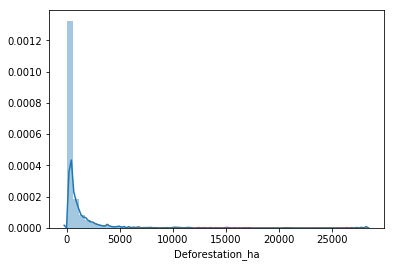

In [33]:
sns.distplot(d["Deforestation_ha"]);
# As we can see in the graph, it's a heavily right-sqewed variable.

# skewness and kurtosis
print("Skewness: %f" % d['Deforestation_ha'].skew())
print("Kurtosis: %f" % d['Deforestation_ha'].kurt())

This confirms that it's skewed and has a high kurtosis. This should worry us if we expected surface area size to follow a normal distribution, which is shouldn't. It likely follows a Poisson distribution better, as we can pretend that surface areas are counts, we know that the lower limit of surface area is 0, and we don't know the upper number of counts.

## Grouping by Month

In [34]:
d_months = df1.groupby(['Year', 'month_num', "Date"])['Deforestation_ha'].sum()
d_months[:12]

Year  month_num   Date      
2012  1900-03-31  2012-03-31    34223.4
      1900-04-30  2012-04-30    27915.0
      1900-05-31  2012-05-31    40156.5
      1900-06-30  2012-06-30    50102.0
      1900-07-31  2012-07-31    66411.5
      1900-08-31  2012-08-31    53974.6
      1900-09-30  2012-09-30    66020.0
      1900-10-31  2012-10-31    59276.0
      1900-11-30  2012-11-30    32674.0
      1900-12-31  2012-12-31    50312.0
2013  1900-01-31  2013-01-31    36671.0
      1900-02-28  2013-02-28    28879.0
Name: Deforestation_ha, dtype: float64

If we look at the d_months, it shows that it's a series:

In [35]:
type(d_months)

pandas.core.series.Series

We need to first convert it to a DataFrame, and then reset its index:

In [36]:
df2 = d_months.to_frame()

df2.reset_index(inplace=True)
type(df2)

pandas.core.frame.DataFrame

In [37]:
df2.head()

,Year,month_num,Date,Deforestation_ha
0,2012,1900-03-31,2012-03-31,34223.4
1,2012,1900-04-30,2012-04-30,27915.0
2,2012,1900-05-31,2012-05-31,40156.5
3,2012,1900-06-30,2012-06-30,50102.0
4,2012,1900-07-31,2012-07-31,66411.5


In [38]:
cols = df2.columns.tolist()
cols = [cols[2]] + cols[:2] + [cols[3]]

In [39]:
df2.head()

,Year,month_num,Date,Deforestation_ha
0,2012,1900-03-31,2012-03-31,34223.4
1,2012,1900-04-30,2012-04-30,27915.0
2,2012,1900-05-31,2012-05-31,40156.5
3,2012,1900-06-30,2012-06-30,50102.0
4,2012,1900-07-31,2012-07-31,66411.5


In [40]:
# Adding the matplotlib deforestation rate
df2['Day_Def_Rate'] =  df2['Deforestation_ha'] / df2['Date'].map(lambda x: x.day)

In [41]:
# Adding matplotlibs date as number:
from datetime import datetime
df2['date_num'] = plt.matplotlib.dates.date2num(df2['Date'])

In [42]:
df2.head()

,Year,month_num,Date,Deforestation_ha,Day_Def_Rate,date_num
0,2012,1900-03-31,2012-03-31,34223.4,1103.980645,734593.0
1,2012,1900-04-30,2012-04-30,27915.0,930.500000,734623.0
2,2012,1900-05-31,2012-05-31,40156.5,1295.370968,734654.0
3,2012,1900-06-30,2012-06-30,50102.0,1670.066667,734684.0
4,2012,1900-07-31,2012-07-31,66411.5,2142.306452,734715.0


Let's save df2 as a .csv file

In [43]:
df2 = df2[cols]
df2.to_csv("C:/Users/user/Dropbox/Data Analysis/Portfolio/Data Sets/Deforestation/def_by_month.csv")

In [44]:
# an interesting function to create dates:
index = pd.date_range(start='2000-1-1', end='2015-1-1', freq='M')

In [45]:
plt.close('all')

## Let's Create Some Figures
### Graphing Deforestation by Month


In [46]:
from __future__ import print_function
import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import MONDAY
from matplotlib.dates import MonthLocator, WeekdayLocator, DateFormatter

In [59]:
# loading the dataframe
df2 = pd.read_csv("C:/Users/user/Dropbox/Data Analysis/Portfolio/Data Sets/Deforestation/def_by_month.csv", 
                encoding = "ISO-8859-1")

In [60]:
# formatting 'Date' to datetime
from datetime import datetime
# df2['Date'] = df2['Date'].apply(lambda x: datetime.strftime(x, "%Y-%m-%d"))
df2["Date"] = pd.to_datetime(df2["Date"], format = "%Y-%m-%d")
df2["date_num"] = plt.matplotlib.dates.date2num(df2["Date"])

In [61]:
df2.head()

,Unnamed: 0,Date,Year,month_num,Deforestation_ha,date_num
0,0,2012-03-31,2012,1900-03-31,34223.4,734593.0
1,1,2012-04-30,2012,1900-04-30,27915.0,734623.0
2,2,2012-05-31,2012,1900-05-31,40156.5,734654.0
3,3,2012-06-30,2012,1900-06-30,50102.0,734684.0
4,4,2012-07-31,2012,1900-07-31,66411.5,734715.0


In [50]:
df2.dtypes

Unnamed: 0                   int64
Date                datetime64[ns]
Year                         int64
month_num                   object
Deforestation_ha           float64
date_num                   float64
dtype: object

In [62]:
# we need to sort the dataframe by date
df2.sort_values(by = 'date_num', ascending=True, inplace=True)

In [63]:
# every 3rd month
months = MonthLocator(bymonthday=1, interval=6)
monthsFmt = DateFormatter("%Y-%m") #-%m-%d

# every monday
marks = MonthLocator()

#### Setting the plot style

In [64]:
plt.matplotlib.style.use('ggplot')

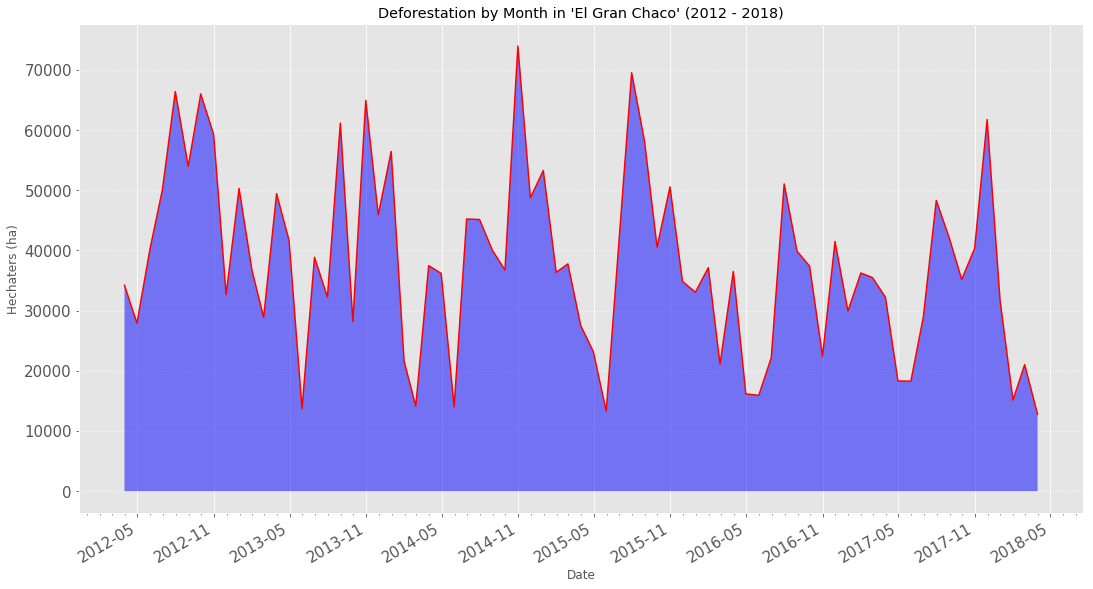

In [65]:
fig, ax = plt.subplots(figsize=(18, 10))

hectmin = df2['Deforestation_ha'].min()
# ax.bar(df2['date_num'], df2['Deforestation_ha'], width = 20)
ax.plot(df2['date_num'], df2['Deforestation_ha'], color='red')
ax.fill_between(df2['date_num'], 0, df2['Deforestation_ha'], facecolor='blue', alpha=0.5)

ax.xaxis.set_major_locator(months)
# ax.xaxis_date()
ax.xaxis.set_major_formatter(monthsFmt)
ax.xaxis.set_minor_locator(marks)
ax.autoscale_view()

ax.set_ylabel('Hechaters (ha)')
ax.set_xlabel('Date')
ax.set_title("Deforestation by Month in 'El Gran Chaco' (2012 - 2018)")

#ax.xaxis.grid(False, 'major')
# ax.yaxis.grid(True, 'major')
ax.grid(which = 'major', axis = 'y', linestyle = 'dotted')

ax.tick_params(axis='both', which='major', labelsize=15)

# rotate and align the tick labels so they look better
fig.autofmt_xdate()

plt.show()

In [55]:
list(ax.get_yticklabels())

[Text(0,-10000,'−10000'),
 Text(0,0,'0'),
 Text(0,10000,'10000'),
 Text(0,20000,'20000'),
 Text(0,30000,'30000'),
 Text(0,40000,'40000'),
 Text(0,50000,'50000'),
 Text(0,60000,'60000'),
 Text(0,70000,'70000'),
 Text(0,80000,'80000')]

In [56]:
list(ax.get_xticklabels())

[Text(734624,0,'2012-05'),
 Text(734808,0,'2012-11'),
 Text(734989,0,'2013-05'),
 Text(735173,0,'2013-11'),
 Text(735354,0,'2014-05'),
 Text(735538,0,'2014-11'),
 Text(735719,0,'2015-05'),
 Text(735903,0,'2015-11'),
 Text(736085,0,'2016-05'),
 Text(736269,0,'2016-11'),
 Text(736450,0,'2017-05'),
 Text(736634,0,'2017-11'),
 Text(736815,0,'2018-05')]

### Grouping by Month and Country

In [66]:
ctry = df1.groupby(['Year', 'Month', 'Country', "Date", "date_num"])['Deforestation_ha'].sum()
ctry[:12]

Year  Month     Country    Date        date_num
2012  April     Argentina  2012-04-30  734623.0    17759.0
                Bolivia    2012-04-30  734623.0      865.0
                Paraguay   2012-04-30  734623.0     9291.0
      August    Argentina  2012-08-31  734746.0    22195.9
                Bolivia    2012-08-31  734746.0     2651.9
                Paraguay   2012-08-31  734746.0    29126.8
      December  Argentina  2012-12-31  734868.0    22666.0
                Bolivia    2012-12-31  734868.0     1819.0
                Paraguay   2012-12-31  734868.0    25827.0
      July      Argentina  2012-07-31  734715.0    34756.4
                Bolivia    2012-07-31  734715.0     4092.0
                Paraguay   2012-07-31  734715.0    27563.1
Name: Deforestation_ha, dtype: float64

If we look at the d_months, it shows that it's a series:

We need to first convert it to a DataFrame, and then reset its index:

Let's save df2 as a .csv file

In [ ]:
df3.to_csv("C:/Users/user/Dropbox/Data Analysis/Portfolio/Data Sets/Deforestation/def_by_mnth_ctry.csv")

In [70]:
# Read the csv
file_loc = "C:/Users/user/Dropbox/Data Analysis/Portfolio/Data Sets/Deforestation/def_by_mnth_ctry.csv"
df3 = pd.read_csv(file_loc, 
                 index_col = 0, parse_dates = ["Date"], 
                  infer_datetime_format = True)

In [71]:
# sorting dataframe by date
# we need to sort the dataframe by date
df3.sort_values(by = ['date_num', "Country"], ascending=True, inplace=True)

In [72]:
df3.reset_index(inplace = True)

In [73]:
df3.drop(df3.columns[[0]], axis = 1, inplace = True)

In [74]:
df3.head(10)

,Year,Month,Country,Date,date_num,Deforestation_ha,Tot_Sum,Arg_Sum,Par_Sum,Bol_Sum
0,2012,March,Argentina,2012-03-31,734593.0,9587.9,9587.9,9587.9,NaN,NaN
1,2012,March,Bolivia,2012-03-31,734593.0,2413.6,12001.5,NaN,NaN,2413.6
2,2012,March,Paraguay,2012-03-31,734593.0,22221.9,34223.4,NaN,22221.9,NaN
3,2012,April,Argentina,2012-04-30,734623.0,17759.0,51982.4,27346.9,NaN,NaN
4,2012,April,Bolivia,2012-04-30,734623.0,865.0,52847.4,NaN,NaN,3278.6
5,2012,April,Paraguay,2012-04-30,734623.0,9291.0,62138.4,NaN,31512.9,NaN
6,2012,May,Argentina,2012-05-31,734654.0,22015.8,84154.2,49362.7,NaN,NaN
7,2012,May,Bolivia,2012-05-31,734654.0,5713.0,89867.2,NaN,NaN,8991.6
8,2012,May,Paraguay,2012-05-31,734654.0,12427.7,102294.9,NaN,43940.6,NaN
9,2012,June,Argentina,2012-06-30,734684.0,31053.0,133347.9,80415.7,NaN,NaN


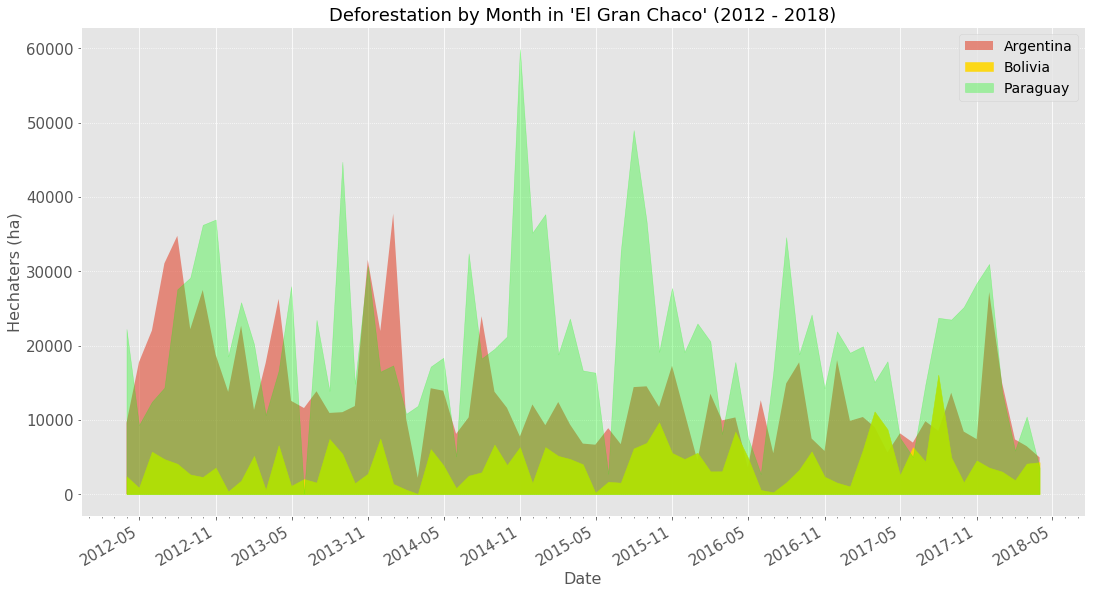

In [75]:
fig, ax = plt.subplots(figsize=(18, 10))

# ax.bar(df2['date_num'], df2['Deforestation_ha'], width = 20)
ax.fill_between(df3['date_num'][df3["Country"] == "Argentina"], 0, 
                df3['Deforestation_ha'][df3["Country"] == "Argentina"], alpha=0.6)

ax.fill_between(df3['date_num'][df3["Country"] == "Bolivia"], 
                df3['Deforestation_ha'][df3["Country"] == "Bolivia"], color = "gold", alpha=0.9)

ax.fill_between(df3['date_num'][df3["Country"] == "Paraguay"], 
                df3['Deforestation_ha'][df3["Country"] == "Paraguay"], color = "lime", alpha=0.3)

ax.xaxis.set_major_locator(months)
# ax.xaxis_date()
ax.xaxis.set_major_formatter(monthsFmt)
ax.xaxis.set_minor_locator(marks)
ax.autoscale_view()

ax.set_ylabel('Hechaters (ha)', fontsize = 16)
ax.set_xlabel('Date', fontsize = 16)
ax.set_title("Deforestation by Month in 'El Gran Chaco' (2012 - 2018)", fontsize = 18)
ax.legend(["Argentina", "Bolivia", "Paraguay"], loc='upper right', fontsize = 14)

#ax.xaxis.grid(False, 'major')
# ax.yaxis.grid(True, 'major')
ax.grid(which = 'major', axis = 'y', linestyle = 'dotted')

ax.tick_params(axis='both', which='major', labelsize=15)

# rotate and align the tick labels so they look better
fig.autofmt_xdate()

plt.show()

Let's do a cumulative sum graph

In [ ]:
def cumul_sum(country):
    lenAr = len(df3[df3["Country"]=="Argentina"])
    lenBo = len(df3[df3["Country"]=="Bolivia"])
    lenPy = len(df3[df3["Country"]=="Paraguay"])
    
    
    if country == "Argentina":
        for i in list(range(lenAr)):
        df2["Cumsum"][i] = 

In [ ]:
lenPy = len(df3[df3["Country"]=="Paraguay"])
lenPy

In [ ]:
list(range(lenPy))

In [ ]:
df3.loc[df3["Country"]=="Argentina"][:5]

In [ ]:
df3.index[df3["Country"]=="Argentina"]

In [ ]:
df3["Tot_Sum"] = (df3["Deforestation_ha"]).cumsum()

In [ ]:
df3.head()

In [ ]:
df3["Arg_Sum"] = (df3["Deforestation_ha"][df3["Country"] == "Argentina"]).cumsum()
df3["Par_Sum"] = (df3["Deforestation_ha"][df3["Country"] == "Paraguay"]).cumsum()
df3["Bol_Sum"] = (df3["Deforestation_ha"][df3["Country"] == "Bolivia"]).cumsum()
df3.sort_values(by = ["Date"], inplace = True)

In [ ]:
df3

In [ ]:
# Save to csv:
df3.to_csv("C:/Users/user/Dropbox/Data Analysis/Portfolio/Data Sets/Deforestation/def_by_mnth_ctry.csv")

### Making a stackplot

In [ ]:
plt.close('all')

In [ ]:
fig, ax = plt.subplots(figsize=(18, 10))
ax.plot(df3.Date, df3.Tot_Sum)
ax.fill_between(df3.date_num, 0,  df3.Tot_Sum, facecolor='green', alpha=0.4)


ax.set_ylabel('Hectares (ha)', size=16, weight = 'bold')
ax.set_xlabel('Year', size=16, weight = 'bold')
ax.set_title('Cumulative Hectares of Deforestation in El Gran Chaco')

ax.tick_params(axis='both', which='major', labelsize=15)

Plot by country. First we need to `sort_values` `Country` and then by `Date`.

In [ ]:
df4 = df3.sort_values(by = ['Country', 'Date'])

In [ ]:
# Close all plots
plt.close('all')

# Create lists with each country's cumulative sum.
arg = df4['Arg_Sum'][df4['Country']=='Argentina'].reset_index()
bol = df4['Bol_Sum'][df4['Country']=='Bolivia'].reset_index()
par = df4['Par_Sum'][df4['Country']=='Paraguay'].reset_index()

# Another list with dates:
dates = list(df4['Date'].unique())

In [ ]:
fig, ax = plt.subplots(figsize = (18, 10))
ax.stackplot (dates, arg['Arg_Sum'], par['Par_Sum'], bol['Bol_Sum'], 
             labels = ['Argentina', 'Paraguay', 'Bolivia'],
            colors = ['c', 'turquoise', 'aquamarine'], alpha = 0.7)

ax.legend(loc = "upper left", fontsize = 16)
ax.set_ylabel('Hectares (ha)', size=16, weight = 'normal', fontsize = 16)
ax.set_xlabel('Year', size=16, weight = 'normal', fontsize = 16)
ax.set_title('Cumulative Hectares of Deforestation in El Gran Chaco', fontsize = 18)

ax.tick_params(axis='both', which='major', labelsize=15)

plt.show()

### Plotting Deforestation Rates Per Day

Let's see what the forestation rate is. For this, we need to divide the number of hectares deforested per month by the number of days per month. To obtain the number of days, there are several ways of doing this, but I will do it with `lstrip`.

In [ ]:
import calendar
cal = calendar.Calendar()
list(cal.itermonthdates(2012, 3))

In [ ]:
calendar.monthrange(2013, 3)

In [ ]:
(df3['Date'][10]).day

In [ ]:
dd = df3['Deforestation_ha'][10]/(df3['Date'][10]).day
print ('Daily deforestion is', dd, 'hectares per day.')

In [ ]:
df4['Deforestation_ha'].map(daily_def)

In [ ]:
def daily (x):
    # Return the number of days of each month.
    return (x.day)

In [ ]:
df4['Day_Def_Rate'] =  df4['Deforestation_ha'] / df4['Date'].map(lambda x: x.day)

In [ ]:
# This is what our dataframe looks like:
# First, let's order the data by date:
df4.sort_values(by = ['Date'], inplace = True)
df4.head(100)

In [ ]:
plt.close('all')
plt.style.use('default')

fig, ax = plt.subplots(figsize = (16, 10))

ax.plot(df4['Date'][df4['Country'] == 'Argentina'], 
        df4['Day_Def_Rate'][df4['Country'] == 'Argentina'], 
        color = 'deeppink')

ax.plot(df4['Date'][df4['Country'] == 'Paraguay'], 
        df4['Day_Def_Rate'][df4['Country'] == 'Paraguay'], 
        color = 'darkcyan')

ax.plot(df4['Date'][df4['Country'] == 'Bolivia'], 
        df4['Day_Def_Rate'][df4['Country'] == 'Bolivia'],
        color = 'k')

ax.set_ylabel('Hectares Deforested Per Day', fontsize = 16)
ax.set_xlabel('Year', fontsize = 16)
ax.set_title ('Deforestation Rates Per Day In El Gran Chaco', fontsize = 18)
ax.legend(['Argentina', 'Paraguay', 'Bolivia'], loc = "upper left", fontsize = 13)

ax.tick_params(axis='both', which='major', labelsize=15)

plt.show()

In [ ]:
plt.close('all')
# plt.style.use('seaborn') # seaborn, default, ggplot

fig, ax = plt.subplots(figsize = (16, 10))

ax.plot(df4['date_num'][df4['Country'] == 'Paraguay'], 
                df4['Day_Def_Rate'][df4['Country'] == 'Paraguay'], 
                color = 'peru', alpha = 0.6)
ax.fill_between(df4['date_num'][df4['Country'] == 'Paraguay'], 0,
                df4['Day_Def_Rate'][df4['Country'] == 'Paraguay'], 
                color = 'peru', alpha = 0.4)

ax.plot(df4['date_num'][df4['Country'] == 'Argentina'], 
                df4['Day_Def_Rate'][df4['Country'] == 'Argentina'], 
                color = 'navy', alpha = 0.4)
ax.fill_between(df4['date_num'][df4['Country'] == 'Argentina'], 0, 
                df4['Day_Def_Rate'][df4['Country'] == 'Argentina'], 
                color = 'navy', alpha = 0.2)

ax.plot(df4['date_num'][df4['Country'] == 'Bolivia'], 
                df4['Day_Def_Rate'][df4['Country'] == 'Bolivia'],
                color = 'k', alpha = 0.3)
ax.fill_between(df4['date_num'][df4['Country'] == 'Bolivia'], 
                df4['Day_Def_Rate'][df4['Country'] == 'Bolivia'],
                color = 'k', alpha = 0.3)

ax.xaxis_date()
ax.set_ylabel('Hectares Deforested Per Day', weight = 'normal', fontsize = 16)
ax.set_xlabel('Year', weight = 'normal', fontsize = 16)
ax.set_title ('Deforestation Rates Per Day In El Gran Chaco', fontsize = 18)
ax.legend(['Paraguay', 'Argentina', 'Bolivia'], loc = "upper left", fontsize = 14)

ax.tick_params(axis='both', which='major', labelsize=15)

plt.show()

In [ ]:
# Let's do a deforestation per day aggregated for the Gran Chaco.



In [ ]:
# loading the dataframe
df5 = pd.read_csv("C:/Users/user/Dropbox/Data Analysis/Portfolio/Data Sets/Deforestation/def_by_month.csv", 
                encoding = "ISO-8859-1", index_col = 0)

In [ ]:
df5['Day_Def_Rate'] =  df4['Deforestation_ha'] / df4['Date'].map(lambda x: x.day)

In [ ]:
from datetime import datetime
df5['Date'] = df5['Date'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))
df5['date_num'] = plt.matplotlib.dates.date2num(df5['Date'])

In [ ]:
df5.head()

In [ ]:
plt.close('all')
# plt.style.use('seaborn') # seaborn, default, ggplot

fig, ax = plt.subplots(figsize = (16, 10))

ax.plot(df5['date_num'], df5['Day_Def_Rate'], color = 'turquoise', alpha = 0.6)
# ax.fill_between(df4['date_num'][df4['Country'] == 'Paraguay'], 0,
#                 df4['Day_Def_Rate'][df4['Country'] == 'Paraguay'], 
#                 color = 'peru', alpha = 0.4)

# ax.plot(df4['date_num'][df4['Country'] == 'Argentina'], 
#                 df4['Day_Def_Rate'][df4['Country'] == 'Argentina'], 
#                 color = 'navy', alpha = 0.4)
# ax.fill_between(df4['date_num'][df4['Country'] == 'Argentina'], 0, 
#                 df4['Day_Def_Rate'][df4['Country'] == 'Argentina'], 
#                 color = 'navy', alpha = 0.2)

# ax.plot(df4['date_num'][df4['Country'] == 'Bolivia'], 
#                 df4['Day_Def_Rate'][df4['Country'] == 'Bolivia'],
#                 color = 'k', alpha = 0.3)
# ax.fill_between(df4['date_num'][df4['Country'] == 'Bolivia'], 
#                 df4['Day_Def_Rate'][df4['Country'] == 'Bolivia'],
#                 color = 'k', alpha = 0.3)

ax.xaxis_date()
ax.set_ylabel('Hectares Deforested Per Day', weight = 'normal', fontsize = 16)
ax.set_xlabel('Year', weight = 'normal', fontsize = 16)
ax.set_title ('Deforestation Rates Per Day In El Gran Chaco', fontsize = 18)
ax.legend(loc = "upper left", fontsize = 14)

ax.tick_params(axis='both', which='major', labelsize=15)

plt.show()